In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('sample_data/heart.csv')

In [ ]:
data.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [ ]:
ageList = ['valid' if (1 < age and age <= 75) else 'invalid' for age in data.iloc[:]['age'].values]

In [ ]:
anaemiaList = ['present' if disease == 1 else 'absent' for disease in data.iloc[:]['anaemia'].values]

In [ ]:
diabetesList = ['present' if disease == 1 else 'absent' for disease in data.iloc[:]['diabetes'].values]

In [ ]:
high_blood_pressure_List = ['present' if disease == 1 else 'absent' for disease in data.iloc[:]['high_blood_pressure'].values]

In [ ]:
genderList = ['male' if gender == 1 else 'female' for gender in data.iloc[:]['sex'].values]

In [ ]:
smokingList = ['smoker' if person == 1 else 'nonSmoker' for person in data.iloc[:]['smoking'].values]

In [ ]:
DEATH_EVENT_LIST = ['yes' if event == 1 else 'no' for event in data.iloc[:]['DEATH_EVENT'].values]

In [ ]:
processed_data = pd.DataFrame()

In [ ]:
processed_data['age'] = ageList

In [ ]:
processed_data['anaemia'] = anaemiaList
processed_data['diabetes'] = diabetesList
processed_data['high_blood_pressure'] = high_blood_pressure_List
processed_data['sex'] = genderList
processed_data['smoking'] = smokingList
processed_data['DEATH_EVENT'] = DEATH_EVENT_LIST

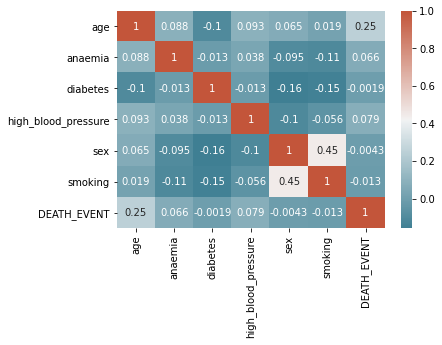

In [ ]:
import seaborn as sns
corr = data[processed_data.columns][:].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

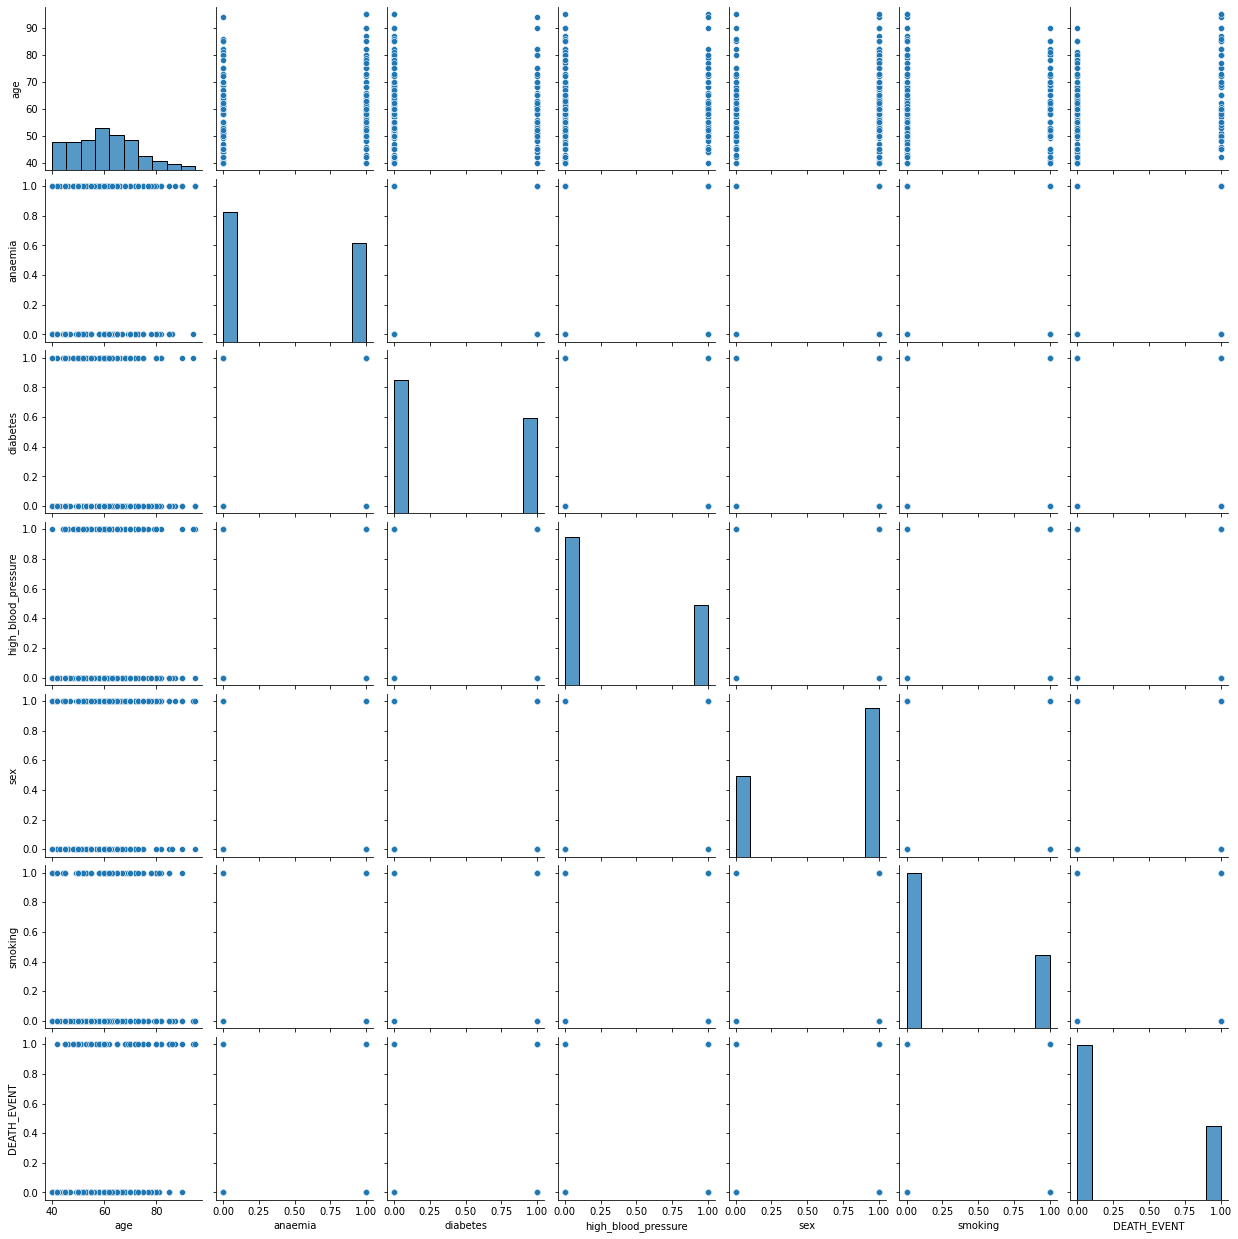

In [ ]:
sns.pairplot(data[processed_data.columns][:])

In [ ]:
train_X = processed_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']][:6]
train_Y = processed_data['DEATH_EVENT'][:6]
test_X = processed_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']][6:15]
test_Y = processed_data[['DEATH_EVENT']][6:15]

In [ ]:

def check(instance_attr_val, constraint):
  if (constraint == '-'):
    return False
  elif ((constraint != '?') and (constraint != instance_attr_val)):
    return False
  return True


def train(train_X):

  n = train_X.shape[0]
  m = train_X.shape[1]

  specific_hypothesis = ['-' for _ in range(m)]

  for i in range(n):

    hypothesis_for_update = ['-']*m

    for j in range(m):
      instance_attr_val = train_X.iloc[i, j]
      constraint = specific_hypothesis[j]
      isSatisfying = check(instance_attr_val, constraint)

      if(isSatisfying == False):
        if(constraint == '-'):
          hypothesis_for_update[j] = instance_attr_val
        else:
          hypothesis_for_update[j] = '?'
    specific_hypothesis = hypothesis_for_update

  return specific_hypothesis


In [ ]:
trained_hypothesis = train(train_X)
trained_hypothesis

['?', 'present', '?', 'present', '?', 'smoker']

In [ ]:

def test(test_X, test_Y, hypothesis):

  n = test_X.shape[0]
  m = test_X.shape[1]

  test_passed_cnt = 0


  for i in range(n):

    isSatisfying = True

    for j in range(m):
      instance_attr_val = test_X.iloc[i, j]
      constraint = hypothesis[j]

      if(check(instance_attr_val, constraint) == False):
        isSatisfying = False
        break

    if (isSatisfying == True) and (test_Y.iloc[i, 0] == 'yes'):
      test_passed_cnt += 1
    
  accuracy = (test_passed_cnt/n)*100

  return accuracy


In [ ]:
accuracy = test(test_X, test_Y, trained_hypothesis)
print(f'accuracy: {accuracy}%')

accuracy: 22.22222222222222%
